In [1]:
import sys
sys.path.append('../../src')

In [2]:
import pandas
import numpy
from energiapy.components.temporal_scale import TemporalScale
from energiapy.components.resource import Resource, VaryingResource
from energiapy.components.process import Process, VaryingProcess
from energiapy.components.material import Material
from energiapy.components.location import Location
from energiapy.components.network import Network
from energiapy.components.scenario import Scenario
from energiapy.components.transport import Transport
from energiapy.model.formulate import formulate, Constraints, Objective
from energiapy.utils.nsrdb_utils import fetch_nsrdb_data
from energiapy.plot import plot_results, plot_scenario
from energiapy.plot.plot_results import CostY, CostX
from energiapy.model.solve import solve
from itertools import product



from energiapy.components.result import Result
import pandas
from itertools import product
from matplotlib import rc
import matplotlib.pyplot as plt
from energiapy.model.solve import solve
from energiapy.plot.plot_results import CostY, CostX
from energiapy.components.location import Location
from energiapy.plot import plot_results, plot_scenario
from energiapy.utils.nsrdb_utils import fetch_nsrdb_data
from energiapy.model.formulate import formulate, Constraints, Objective
from energiapy.model.bounds import CapacityBounds
from energiapy.utils.data_utils import get_data, make_henry_price_df, remove_outliers, load_results
from energiapy.components.transport import Transport
from energiapy.components.scenario import Scenario
from energiapy.components.network import Network
from energiapy.components.location import Location
from energiapy.components.material import Material

from energiapy.conversion.photovoltaic import solar_power_output
from energiapy.conversion.windmill import wind_power_output

from energiapy.utils.data_utils import load_results




In [3]:
results_cost = load_results(filename='results_cost.pkl')
results_gwp_3 = load_results(filename='results_gwp_3.pkl')
results_gwp_6 = load_results(filename='results_gwp_6.pkl')
results_gwp_9 = load_results(filename='results_gwp_9.pkl')



In [4]:
cost = [results_cost.output['objective'],
results_gwp_3.output['objective'],
results_gwp_6.output['objective'],
results_gwp_9.output['objective']]

In [5]:
cost = [i/min(cost) for i in cost]

In [6]:
gwp= [results_cost.output['global_warming_potential_network'][0],
results_gwp_3.output['global_warming_potential_network'][0],
results_gwp_6.output['global_warming_potential_network'][0],
results_gwp_9.output['global_warming_potential_network'][0]]

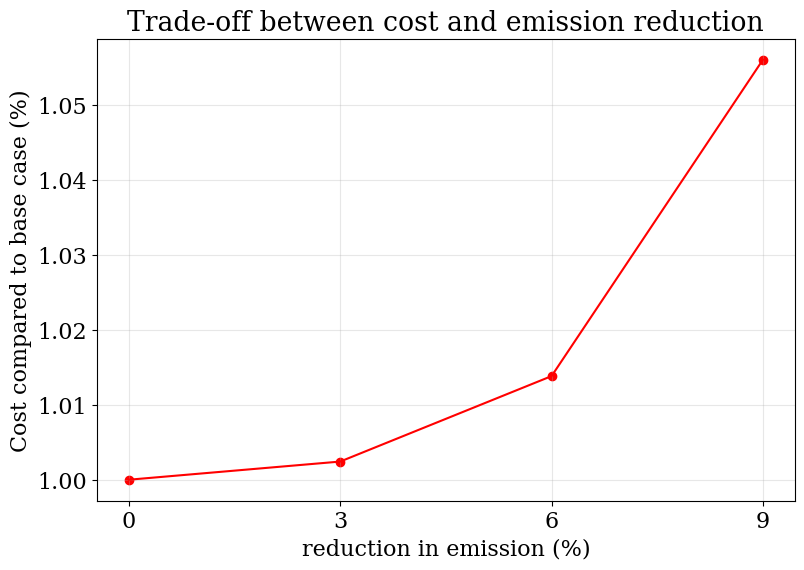

In [67]:
rc('font', **{'family': 'serif',
    'serif': ['Computer Modern'], 'size': 16})
fig, ax = plt.subplots(figsize=(9,6))
y_ = cost
x_ = [0, 3, 6, 9]
ax.plot(x_, y_, color='red')
ax.scatter(x_, y_, color='red')
plt.title(f'Trade-off between cost and emission reduction')
plt.ylabel("Cost compared to base case (%)")
plt.xlabel("reduction in emission (%)")
ax.set_xticks(x_)
ax.set_xticklabels(x_)
plt.grid(alpha=0.3)
plt.rcdefaults()

In [8]:
results_cost.output['global_warming_potential_process']

{('HO', 'Adsorption', 0): 0.0,
 ('HO', 'CO_2-Olefin production', 0): 0.0,
 ('HO', 'Compression molding', 0): 0.0,
 ('HO', 'Driving', 0): 0.0,
 ('HO', 'Extrusion', 0): 0.0,
 ('HO', 'HDPE production', 0): 0.0,
 ('HO', 'Injection molding', 0): 0.0,
 ('HO', 'LiI', 0): 0.0,
 ('HO', 'LiI_d', 0): 0.0,
 ('HO', 'PV', 0): 0.0,
 ('HO', 'WF', 0): 0.0}

In [9]:
results_cost.output['global_warming_potential_material']

{('HO', 'Adsorption', 0): 0.0,
 ('HO', 'CO_2-Olefin production', 0): 0.0,
 ('HO', 'Compression molding', 0): 0.0,
 ('HO', 'Driving', 0): 0.0,
 ('HO', 'Extrusion', 0): 0.0,
 ('HO', 'HDPE production', 0): 0.0,
 ('HO', 'Injection molding', 0): 0.0,
 ('HO', 'LiI', 0): 62874545903.4392,
 ('HO', 'LiI_d', 0): 0.0,
 ('HO', 'PV', 0): 0.0,
 ('HO', 'WF', 0): 1520875038598.7373}

In [11]:
results_cost.output['global_warming_potential_resource_consumption']

{('HO', 'CO2_air', 0): 0.0,
 ('HO', 'Cooling water', 0): 0.0,
 ('HO', 'H2O', 0): 0.0,
 ('HO', 'Hydrogen', 0): 0.0,
 ('HO', 'Natural Gas', 0): 2579249421.9438577,
 ('HO', 'Oil', 0): 0.0,
 ('HO', 'Oxygen', 0): 0.0,
 ('HO', 'Solar', 0): 0.0,
 ('HO', 'Wind', 0): 0.0}

In [13]:
results_gwp_6.output['global_warming_potential_resource_consumption']

{('HO', 'CO2_air', 0): 0.0,
 ('HO', 'Cooling water', 0): 0.0,
 ('HO', 'H2O', 0): 0.0,
 ('HO', 'Hydrogen', 0): 0.0,
 ('HO', 'Natural Gas', 0): 2176377591.4086676,
 ('HO', 'Oil', 0): 0.0,
 ('HO', 'Oxygen', 0): 0.0,
 ('HO', 'Solar', 0): 0.0,
 ('HO', 'Wind', 0): 0.0}

In [30]:
em_material_gwp_6 = sum(results_gwp_6.output['global_warming_potential_material'].values())
em_resource_cons_gwp_6 = sum(results_gwp_6.output['global_warming_potential_resource_consumption'].values())
em_resource_disc_gwp_6 = sum(results_gwp_6.output['global_warming_potential_resource_discharge'].values())


In [35]:
em_material_gwp_9 = sum(results_gwp_9.output['global_warming_potential_material'].values())
em_resource_cons_gwp_9 = sum(results_gwp_9.output['global_warming_potential_resource_consumption'].values())
em_resource_disc_gwp_9 = sum(results_gwp_9.output['global_warming_potential_resource_discharge'].values())


In [32]:
em_material_cost = sum(results_cost.output['global_warming_potential_material'].values())
em_resource_cons_cost = sum(results_cost.output['global_warming_potential_resource_consumption'].values())
em_resource_disc_cost = sum(results_cost.output['global_warming_potential_resource_discharge'].values())

In [47]:
max_reduction = (results_cost.output['objective'] - results_gwp_9.output['objective'])/results_cost.output['objective']
max_reduction

-0.05608221025286768

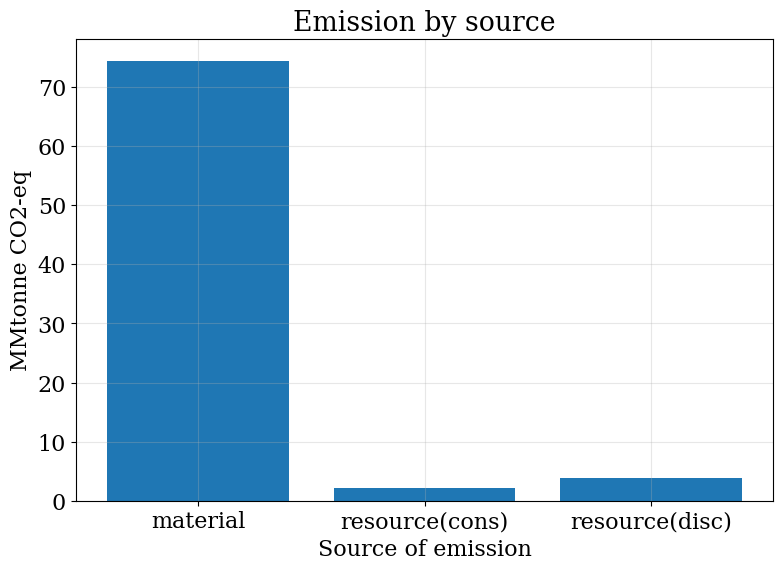

In [66]:
rc('font', **{'family': 'serif',
    'serif': ['Computer Modern'], 'size': 16})
fig, ax = plt.subplots(figsize=(9,6))
# ax.plot(x_, y_, linewidth=0.5, color='red')
x_  = ['material', 'resource(cons)', 'resource(disc)']
y_ = [em_material_gwp_6/20, em_resource_cons_gwp_6, em_resource_disc_gwp_6]
y_ = [i/10**9 for i in y_]
ax.bar(x_, y_)
# ax.set_yscale('log')
plt.title(f'Emission by source')
plt.ylabel("MMtonne CO2-eq")
plt.xlabel("Source of emission")
plt.grid(alpha=0.3)
plt.rcdefaults()

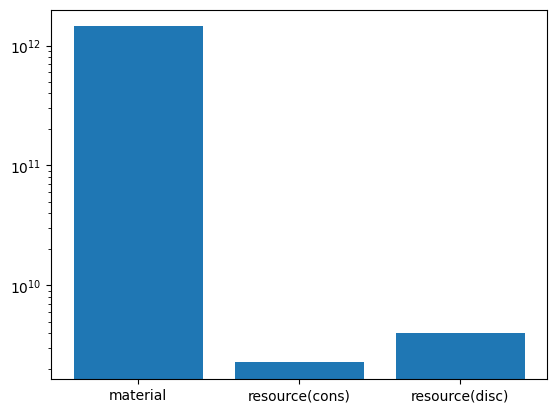

In [36]:
plt.bar(['material', 'resource(cons)', 'resource(disc)'], [em_material_gwp_9, em_resource_cons_gwp_9, em_resource_disc_gwp_9])
plt.yscale('log')

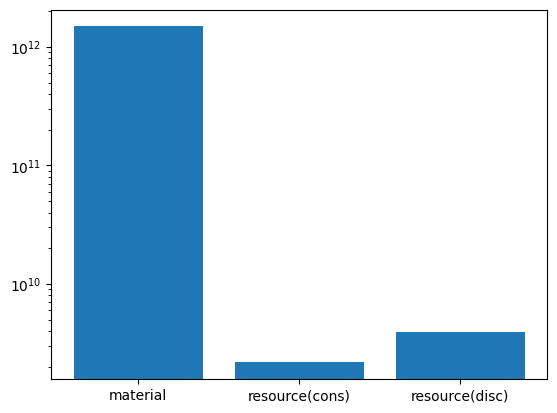

In [31]:
plt.bar(['material', 'resource(cons)', 'resource(disc)'], [em_material_gwp_6, em_resource_cons_gwp_6, em_resource_disc_gwp_6])
plt.yscale('log')

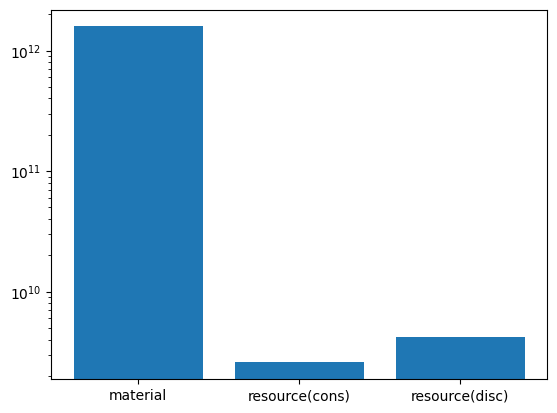

In [33]:
plt.bar(['material', 'resource(cons)', 'resource(disc)'], [em_material_cost, em_resource_cons_cost, em_resource_disc_cost])
plt.yscale('log')

In [12]:
results_cost.output['global_warming_potential_resource_discharge']

{('HO', 'C4 fraction', 0): 0.0,
 ('HO', 'C5 fraction', 0): 0.0,
 ('HO', 'CO2_Vent', 0): 4184746875.3198185,
 ('HO', 'LPG', 0): 0.0,
 ('HO', 'Miles', 0): 0.0,
 ('HO', 'Propylene', 0): 0.0}

In [14]:
results_gwp_6.output['global_warming_potential_resource_discharge']

{('HO', 'C4 fraction', 0): 0.0,
 ('HO', 'C5 fraction', 0): 0.0,
 ('HO', 'CO2_Vent', 0): 3919704122.5654783,
 ('HO', 'LPG', 0): 0.0,
 ('HO', 'Miles', 0): 0.0,
 ('HO', 'Propylene', 0): 0.0}

In [15]:
results_cost.output['S_network']

{('C4 fraction', 0): 0.0,
 ('C5 fraction', 0): 0.0,
 ('CO2_Vent', 0): 4184746.8753198185,
 ('LPG', 0): 0.0,
 ('Miles', 0): 163404673379.99988,
 ('Propylene', 0): 0.0}

In [17]:
results_gwp_6.output['S_network']

{('C4 fraction', 0): 81697.03362134685,
 ('C5 fraction', 0): 0.0,
 ('CO2_Vent', 0): 3919704.1225654786,
 ('LPG', 0): 40848.51681067343,
 ('Miles', 0): 163404673379.9999,
 ('Propylene', 0): 204242.58405336714}

In [48]:
results_cost.output['Cap_P']

{('HO', 'Adsorption', 0): 0.0,
 ('HO', 'CO_2-Olefin production', 0): 0.0,
 ('HO', 'Compression molding', 0): 314.8126927250356,
 ('HO', 'Driving', 0): 96326114.00309223,
 ('HO', 'Extrusion', 0): 120.08319207037442,
 ('HO', 'HDPE production', 0): 1418.4356467019725,
 ('HO', 'Injection molding', 0): 863.3007862356646,
 ('HO', 'LiI', 0): 1122759.7482757,
 ('HO', 'LiI_d', 0): 714459.6655495723,
 ('HO', 'PV', 0): 0.0,
 ('HO', 'WF', 0): 5129980.878346685}

In [50]:
results_gwp_3.output['Cap_P']

{('HO', 'Adsorption', 0): 0.0,
 ('HO', 'CO_2-Olefin production', 0): 0.0,
 ('HO', 'Compression molding', 0): 303.21764442724174,
 ('HO', 'Driving', 0): 92778271.20635921,
 ('HO', 'Extrusion', 0): 115.66033859595821,
 ('HO', 'HDPE production', 0): 1366.1924233158468,
 ('HO', 'Injection molding', 0): 831.5040558520237,
 ('HO', 'LiI', 0): 1286800.9661547744,
 ('HO', 'LiI_d', 0): 714459.6655495714,
 ('HO', 'PV', 0): 0.0,
 ('HO', 'WF', 0): 4938048.79602939}

In [72]:
results_gwp_6.output['global_warming_potential_material']

{('HO', 'Adsorption', 0): 0.0,
 ('HO', 'CO_2-Olefin production', 0): 0.0,
 ('HO', 'Compression molding', 0): 0.0,
 ('HO', 'Driving', 0): 0.0,
 ('HO', 'Extrusion', 0): 0.0,
 ('HO', 'HDPE production', 0): 0.0,
 ('HO', 'Injection molding', 0): 0.0,
 ('HO', 'LiI', 0): 86595754962.07527,
 ('HO', 'LiI_d', 0): 0.0,
 ('HO', 'PV', 0): 0.0,
 ('HO', 'WF', 0): 1402390929275.246}

In [74]:
results_gwp_6.output['global_warming_potential_material_mode']

{('HO', 'Adsorption', 'A', 0): 0.0,
 ('HO', 'Adsorption', 'B', 0): 0.0,
 ('HO', 'Adsorption', 'Brine', 0): 0.0,
 ('HO', 'Adsorption', 'D', 0): 0.0,
 ('HO', 'Adsorption', 'HDPE BAU', 0): 0.0,
 ('HO', 'Adsorption', 'HDPE CM', 0): 0.0,
 ('HO', 'Adsorption', 'HDPE CO2', 0): 0.0,
 ('HO', 'Adsorption', 'HDPE E', 0): 0.0,
 ('HO', 'Adsorption', 'HDPE IM', 0): 0.0,
 ('HO', 'Adsorption', 'Mo', 0): 0.0,
 ('HO', 'Adsorption', 'Po', 0): 0.0,
 ('HO', 'Adsorption', 'RMTO', 0): 0.0,
 ('HO', 'Adsorption', 'RMTP', 0): 0.0,
 ('HO', 'Adsorption', 'ROCM', 0): 0.0,
 ('HO', 'Adsorption', 'Rock', 0): 0.0,
 ('HO', 'Adsorption', 'WF_L', 0): 0.0,
 ('HO', 'Adsorption', 'WF_O', 0): 0.0,
 ('HO', 'CO_2-Olefin production', 'A', 0): 0.0,
 ('HO', 'CO_2-Olefin production', 'B', 0): 0.0,
 ('HO', 'CO_2-Olefin production', 'Brine', 0): 0.0,
 ('HO', 'CO_2-Olefin production', 'D', 0): 0.0,
 ('HO', 'CO_2-Olefin production', 'HDPE BAU', 0): 0.0,
 ('HO', 'CO_2-Olefin production', 'HDPE CM', 0): 0.0,
 ('HO', 'CO_2-Olefin product

In [73]:
results_gwp_6.output['global_warming_potential_resource']

{('HO', 'C4 fraction', 0): 0.0,
 ('HO', 'C5 fraction', 0): 0.0,
 ('HO', 'CO2', 0): 0.0,
 ('HO', 'CO2_Vent', 0): 3919704122.5654783,
 ('HO', 'CO2_air', 0): 0.0,
 ('HO', 'Cooling water', 0): 0.0,
 ('HO', 'Ethylene', 0): 0.0,
 ('HO', 'H2O', 0): 0.0,
 ('HO', 'HDPE_CM', 0): 0.0,
 ('HO', 'HDPE_E', 0): 0.0,
 ('HO', 'HDPE_IM', 0): 0.0,
 ('HO', 'High density polyethylene', 0): 0.0,
 ('HO', 'Hydrogen', 0): 0.0,
 ('HO', 'LPG', 0): 0.0,
 ('HO', 'LiIPower', 0): 0.0,
 ('HO', 'Miles', 0): 0.0,
 ('HO', 'Natural Gas', 0): 2176377591.4086676,
 ('HO', 'Oil', 0): 0.0,
 ('HO', 'Oxygen', 0): 0.0,
 ('HO', 'Power', 0): 0.0,
 ('HO', 'Propylene', 0): 0.0,
 ('HO', 'Solar', 0): 0.0,
 ('HO', 'Wind', 0): 0.0}

In [ ]:
gwp_lith = results_gwp_6.output['global_warming_potential_material'][('HO', 'LiI', 0)]


In [62]:
results_cost.output['Cap_P_M']

{('HO', 'Adsorption', 'A', 0): 0.0,
 ('HO', 'Adsorption', 'B', 0): 0.0,
 ('HO', 'Adsorption', 'Brine', 0): 0.0,
 ('HO', 'Adsorption', 'D', 0): 0.0,
 ('HO', 'Adsorption', 'HDPE BAU', 0): 0.0,
 ('HO', 'Adsorption', 'HDPE CM', 0): 0.0,
 ('HO', 'Adsorption', 'HDPE CO2', 0): 0.0,
 ('HO', 'Adsorption', 'HDPE E', 0): 0.0,
 ('HO', 'Adsorption', 'HDPE IM', 0): 0.0,
 ('HO', 'Adsorption', 'Mo', 0): 0.0,
 ('HO', 'Adsorption', 'Po', 0): 0.0,
 ('HO', 'Adsorption', 'RMTO', 0): 0.0,
 ('HO', 'Adsorption', 'RMTP', 0): 0.0,
 ('HO', 'Adsorption', 'ROCM', 0): 0.0,
 ('HO', 'Adsorption', 'Rock', 0): 0.0,
 ('HO', 'Adsorption', 'WF_L', 0): 0.0,
 ('HO', 'Adsorption', 'WF_O', 0): 0.0,
 ('HO', 'CO_2-Olefin production', 'A', 0): 0.0,
 ('HO', 'CO_2-Olefin production', 'B', 0): 0.0,
 ('HO', 'CO_2-Olefin production', 'Brine', 0): 0.0,
 ('HO', 'CO_2-Olefin production', 'D', 0): 0.0,
 ('HO', 'CO_2-Olefin production', 'HDPE BAU', 0): 0.0,
 ('HO', 'CO_2-Olefin production', 'HDPE CM', 0): 0.0,
 ('HO', 'CO_2-Olefin product

In [64]:
results_gwp_6.output['Cap_P_M']

{('HO', 'Adsorption', 'A', 0): 0.0,
 ('HO', 'Adsorption', 'B', 0): 6708.776719318552,
 ('HO', 'Adsorption', 'Brine', 0): 0.0,
 ('HO', 'Adsorption', 'D', 0): 0.0,
 ('HO', 'Adsorption', 'HDPE BAU', 0): 0.0,
 ('HO', 'Adsorption', 'HDPE CM', 0): 0.0,
 ('HO', 'Adsorption', 'HDPE CO2', 0): 0.0,
 ('HO', 'Adsorption', 'HDPE E', 0): 0.0,
 ('HO', 'Adsorption', 'HDPE IM', 0): 0.0,
 ('HO', 'Adsorption', 'Mo', 0): 0.0,
 ('HO', 'Adsorption', 'Po', 0): 0.0,
 ('HO', 'Adsorption', 'RMTO', 0): 0.0,
 ('HO', 'Adsorption', 'RMTP', 0): 0.0,
 ('HO', 'Adsorption', 'ROCM', 0): 0.0,
 ('HO', 'Adsorption', 'Rock', 0): 0.0,
 ('HO', 'Adsorption', 'WF_L', 0): 0.0,
 ('HO', 'Adsorption', 'WF_O', 0): 0.0,
 ('HO', 'CO_2-Olefin production', 'A', 0): 0.0,
 ('HO', 'CO_2-Olefin production', 'B', 0): 0.0,
 ('HO', 'CO_2-Olefin production', 'Brine', 0): 0.0,
 ('HO', 'CO_2-Olefin production', 'D', 0): 0.0,
 ('HO', 'CO_2-Olefin production', 'HDPE BAU', 0): 0.0,
 ('HO', 'CO_2-Olefin production', 'HDPE CM', 0): 0.0,
 ('HO', 'CO_2-

In [63]:
results_gwp_9.output['Cap_P_M']

{('HO', 'Adsorption', 'A', 0): 0.0,
 ('HO', 'Adsorption', 'B', 0): 6274.728916766887,
 ('HO', 'Adsorption', 'Brine', 0): 0.0,
 ('HO', 'Adsorption', 'D', 0): 0.0,
 ('HO', 'Adsorption', 'HDPE BAU', 0): 0.0,
 ('HO', 'Adsorption', 'HDPE CM', 0): 0.0,
 ('HO', 'Adsorption', 'HDPE CO2', 0): 0.0,
 ('HO', 'Adsorption', 'HDPE E', 0): 0.0,
 ('HO', 'Adsorption', 'HDPE IM', 0): 0.0,
 ('HO', 'Adsorption', 'Mo', 0): 0.0,
 ('HO', 'Adsorption', 'Po', 0): 0.0,
 ('HO', 'Adsorption', 'RMTO', 0): 0.0,
 ('HO', 'Adsorption', 'RMTP', 0): 0.0,
 ('HO', 'Adsorption', 'ROCM', 0): 0.0,
 ('HO', 'Adsorption', 'Rock', 0): 0.0,
 ('HO', 'Adsorption', 'WF_L', 0): 0.0,
 ('HO', 'Adsorption', 'WF_O', 0): 0.0,
 ('HO', 'CO_2-Olefin production', 'A', 0): 0.0,
 ('HO', 'CO_2-Olefin production', 'B', 0): 0.0,
 ('HO', 'CO_2-Olefin production', 'Brine', 0): 0.0,
 ('HO', 'CO_2-Olefin production', 'D', 0): 0.0,
 ('HO', 'CO_2-Olefin production', 'HDPE BAU', 0): 0.0,
 ('HO', 'CO_2-Olefin production', 'HDPE CM', 0): 0.0,
 ('HO', 'CO_2-

In [53]:
(results_gwp_3.output['Cap_P'][('HO', 'LiI', 0)] - results_cost.output['Cap_P'][('HO', 'LiI', 0)])/results_cost.output['Cap_P'][('HO', 'LiI', 0)]

0.14610536059117177

In [54]:
(results_gwp_3.output['Cap_P'][('HO', 'WF', 0)] - results_cost.output['Cap_P'][('HO', 'WF', 0)])/results_cost.output['Cap_P'][('HO', 'WF', 0)]

-0.03741380072729477

In [61]:
results_gwp_6.output['Cap_P']

{('HO', 'Adsorption', 0): 6708.776719318552,
 ('HO', 'CO_2-Olefin production', 0): 1225.9278021671032,
 ('HO', 'Compression molding', 0): 257.005518340295,
 ('HO', 'Driving', 0): 78638325.04585136,
 ('HO', 'Extrusion', 0): 98.03303276897854,
 ('HO', 'HDPE production', 0): 1157.976781232879,
 ('HO', 'Injection molding', 0): 704.7780193661698,
 ('HO', 'LiI', 0): 1546352.7671799157,
 ('HO', 'LiI_d', 0): 714459.6655495714,
 ('HO', 'PV', 0): 0.0,
 ('HO', 'WF', 0): 4730328.573067571}

In [60]:
results_gwp_9.output['Cap_P']

{('HO', 'Adsorption', 0): 6274.728916766887,
 ('HO', 'CO_2-Olefin production', 0): 1148.0429944010525,
 ('HO', 'Compression molding', 0): 249.12197441432994,
 ('HO', 'Driving', 0): 76226125.12980741,
 ('HO', 'Extrusion', 0): 95.0259077662908,
 ('HO', 'HDPE production', 0): 1122.4562956065367,
 ('HO', 'Injection molding', 0): 683.1592288063068,
 ('HO', 'LiI', 0): 2157254.053948873,
 ('HO', 'LiI_d', 0): 714459.6655495714,
 ('HO', 'PV', 0): 0.0,
 ('HO', 'WF', 0): 4453400.826795594}